> ### Import Library

In [60]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [61]:
data = pd.read_csv(
    "ShinzoabeCombinedTweets.csv",
    compression="gzip"
)
data.head()

Unnamed: 0         hashed_userid  masked_username       location  \
0           0    287846315736503741   *******itcombo  United States   
1           1  77024876026066251602  ********f_india          India   
2           2  63426519463404723804    *******a_Dass  Jaipur, India   
3           3  14069496998650258114     ******umar02          NOIDA   
4           4  15812102053603243155         ****sNow          India   

   following  followers  totaltweets usercreateddt              tweetid  \
0        398         24        33582    2010-08-16  1545281450970423297   
1          0        799        24993    2008-09-21  1545281455466872837   
2        653        545          590    2021-06-26  1545281463771627520   
3        419        921         1239    2010-02-13  1545281470398230528   
4        371   10237893       818355    2011-01-20  1545281471925358592   

               tweetcreatedts  retweetcount  \
0  2022-07-08 05:39:42.000000             0   
1  2022-07-08 05:39:43.000000             0   
2  2022-07-08 05:39:45.000000           124   
3  2022-07-08 05:39:47.000000             0   
4  2022-07-08 05:39:47.000000             0   

                                                                                                                                                                                                                                                                                        text  \
0                                                                                                                                                                                                                                   Lol, friend made this #Shinzoabe https://t.co/kjLTxkzWrz   
1                   #UPDATE from #Japan since #ShinzoAbeShot \n\n#ShinzoAbe suffered an injury to the RIGHT SIDE OF HIS NECK due to a gunshot and is BLEEDING INTERNALLY IN HIS CHEST, #KyodoNews reports, citing the #Japanese Fire and Disaster Management Agency. https://t.co/n6yePrUBVH   
2  #BreakingNews Shocking \nA clear picture of Japan's former Prime Minister Shinzo Abe. The moment he was shot by a gunman Tetsuya Yamagmi. Nara\n\npray for his life🙏 A true friend of India and a great human being. \n\n#Shinzoabe #Japan #ShinzoAbeShot #shinzo https://t.co/SUsHE8Q2Z3   
3                                                                                                           Shocked to hear the news of the attack on former PM of Japan, Shinzo Abe, Prayers for his recovery. My thoughts are with his family.\n#ShinzoAbe #Shinzo https://t.co/LlbDpNWYxX   
4                                                                                                                                                                                                      Moment when former Japanese PM #ShinzoAbe was shot - Watch\n\nhttps://t.co/eCGHPB4YE6   

                                                                                                                                                                                                                                                                 hashtags  \
0                                                                                                                                                                                                                            [{'text': 'Shinzoabe', 'indices': [22, 32]}]   
1  [{'text': 'UPDATE', 'indices': [0, 7]}, {'text': 'Japan', 'indices': [13, 19]}, {'text': 'ShinzoAbeShot', 'indices': [26, 40]}, {'text': 'ShinzoAbe', 'indices': [43, 53]}, {'text': 'KyodoNews', 'indices': [161, 171]}, {'text': 'Japanese', 'indices': [192, 201]}]   
2                                     [{'text': 'BreakingNews', 'indices': [0, 13]}, {'text': 'Shinzoabe', 'indices': [212, 222]}, {'text': 'Japan', 'indices': [223, 229]}, {'text': 'ShinzoAbeShot', 'indices': [230, 244]}, {'text': 'shinzo', 'indices': [245, 252]}]   
3                                    

In [62]:
data['tweetcreatedts'].min(), data['tweetcreatedts'].max()

('2022-07-08 05:39:42.000000', '2022-07-09 12:17:34.000000')

In [63]:
data['language'].value_counts()

language
en    132094
Name: count, dtype: int64

> ### Check data type

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132094 entries, 0 to 132093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             132094 non-null  int64 
 1   hashed_userid          132094 non-null  object
 2   masked_username        132094 non-null  object
 3   location               83106 non-null   object
 4   following              132094 non-null  int64 
 5   followers              132094 non-null  int64 
 6   totaltweets            132094 non-null  int64 
 7   usercreateddt          132094 non-null  object
 8   tweetid                132094 non-null  int64 
 9   tweetcreatedts         132094 non-null  object
 10  retweetcount           132094 non-null  int64 
 11  text                   132094 non-null  object
 12  hashtags               132094 non-null  object
 13  language               132094 non-null  object
 14  favorite_count         132094 non-null  int64 
 15  

- Change to datetime

In [65]:
#change to datetime
data['tweetcreatedts'] = pd.to_datetime(data['tweetcreatedts'])
data['usercreateddt'] = pd.to_datetime(data['usercreateddt'])
data['extractedts'] = pd.to_datetime(data['extractedts'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132094 entries, 0 to 132093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             132094 non-null  int64         
 1   hashed_userid          132094 non-null  object        
 2   masked_username        132094 non-null  object        
 3   location               83106 non-null   object        
 4   following              132094 non-null  int64         
 5   followers              132094 non-null  int64         
 6   totaltweets            132094 non-null  int64         
 7   usercreateddt          132094 non-null  datetime64[ns]
 8   tweetid                132094 non-null  int64         
 9   tweetcreatedts         132094 non-null  datetime64[ns]
 10  retweetcount           132094 non-null  int64         
 11  text                   132094 non-null  object        
 12  hashtags               132094 non-null  obje

> ### Data Cleaning

In [66]:
data['location'].value_counts()

location
India                                                                                                                                                  5078
New Delhi, India                                                                                                                                       2083
Mumbai, India                                                                                                                                           975
United States                                                                                                                                           858
Lagos, Nigeria                                                                                                                                          587
USA                                                                                                                                                     565
भारत                                                   

In [67]:
data.isna().sum()

Unnamed: 0                   0
hashed_userid                0
masked_username              0
location                 48988
following                    0
followers                    0
totaltweets                  0
usercreateddt                0
tweetid                      0
tweetcreatedts               0
retweetcount                 0
text                         0
hashtags                     0
language                     0
favorite_count               0
is_retweet                   0
original_tweet_id            0
in_reply_to_status_id        0
is_quote_status              0
quoted_status_id             0
extractedts                  0
dtype: int64

- Try to fix location

In [68]:
import re
import pandas as pd
import pycountry
from geotext import GeoText

# =========================
# BUILD COUNTRY KEYWORDS (AUTO)
# =========================
country_lookup = {}

for c in pycountry.countries:
    names = set()
    names.add(c.name.lower())
    if hasattr(c, "official_name"):
        names.add(c.official_name.lower())
    if hasattr(c, "alpha_2"):
        names.add(c.alpha_2.lower())
    if hasattr(c, "alpha_3"):
        names.add(c.alpha_3.lower())

    for n in names:
        country_lookup[n] = c.name


def extract_country(location):
    if pd.isna(location):
        return "Unknown"

    text = str(location).lower()

    # =========================
    # REMOVE EMOJI & SYMBOL
    # =========================
    text = re.sub(
        "["
        "\U0001F1E0-\U0001F1FF"
        "\U0001F300-\U0001F5FF"
        "\U0001F600-\U0001F64F"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FAFF"
        "]+",
        " ",
        text
    )

    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # =========================
    # 1️⃣ DIRECT COUNTRY MATCH
    # =========================
    for key, country in country_lookup.items():
        if f" {key} " in f" {text} ":
            return country

    # =========================
    # 2️⃣ GEO PARSE (CITY → COUNTRY)
    # =========================
    places = GeoText(text)

    if places.countries:
        try:
            return pycountry.countries.lookup(places.countries[0]).name
        except:
            pass

    if places.cities:
        for city in places.cities:
            try:
                return pycountry.countries.search_fuzzy(city)[0].name
            except:
                continue

    return "Unknown"


# =========================
# APPLY (SATU KOLOM)
# =========================
data["country"] = data["location"].apply(extract_country)


In [69]:
data['country'].value_counts()

country
Unknown                                         88084
India                                           21760
United States                                    3895
Nigeria                                          1889
Canada                                           1773
Pakistan                                          985
Japan                                             889
Australia                                         614
Hong Kong                                         595
Thailand                                          538
Malaysia                                          536
United Kingdom                                    517
Andorra                                           399
Israel                                            368
Germany                                           330
Indonesia                                         323
Kenya                                             285
France                                            284
Gabon               

---

```markdown
## Location to Country Normalization Pipeline

This code implements an automated pipeline to normalize free-text Twitter `location` fields into a single standardized **country** label.

Because Twitter locations are user-defined and unstructured, the pipeline prioritizes **accuracy, scalability, and reproducibility**, while safely handling ambiguous or non-geographical entries.

---

### 1. Country Reference Construction (Automatic)

A comprehensive country lookup dictionary is automatically generated using the `pycountry` library.

For each country, multiple identifiers are collected:
- Official country name
- Official long name (if available)
- ISO Alpha-2 code
- ISO Alpha-3 code

All identifiers are normalized to lowercase and stored in a lookup dictionary, allowing direct country detection without manual mapping.

This approach ensures:
- No hardcoded country lists
- Easy scalability to large datasets
- Full reproducibility

---

### 2. Text Normalization

Each `location` value is normalized through:
- Lowercasing
- Removal of emojis (including national flags)
- Removal of special characters and punctuation
- Whitespace normalization

This step reduces noise while preserving meaningful geographic keywords.

---

### 3. Direct Country Name Matching (Primary Strategy)

The cleaned text is first matched against the automatically generated country lookup.

Word-boundary matching is applied to avoid false positives (e.g., avoiding matches such as `"us"` inside `"russia"`).

If a valid country name or ISO code is detected, the standardized country name is immediately returned.

This step provides the highest confidence classification.

---

### 4. City-to-Country Inference (Fallback Strategy)

If no direct country match is found, the `GeoText` library is used as a fallback.

- Detected country names are mapped via `pycountry`
- If only city names are detected, a fuzzy country search is performed to infer the most likely country

This allows partial recovery of locations that only contain city or region information.

---

### 5. Ambiguity Handling

Entries that cannot be confidently associated with a real geographic location are labeled as:

```

Unknown

```

This includes:
- Abstract locations (e.g., "Earth", "Your heart")
- Personal descriptions
- Symbolic or fictional locations

Returning `Unknown` is a deliberate design choice to preserve analytical validity and avoid misclassification.

---

### 6. Output

The final output is a single column:

```

country

```

Each row contains:
- A standardized country name, or
- `Unknown` if no reliable geographic interpretation is possible

---

### Design Considerations

- Twitter location data is inherently noisy and multilingual
- 100% classification accuracy is neither realistic nor methodologically sound
- Conservative labeling (`Unknown`) is preferred over incorrect inference
- The pipeline is suitable for large-scale social media analysis and academic research

---

### Summary

This pipeline transforms unstructured Twitter location data into a clean, standardized country-level feature using:
- Automated country references
- Rule-based text normalization
- Hierarchical geographic inference
- Explicit ambiguity handling

The result is a robust and defensible preprocessing step for downstream analysis.
```

---



In [70]:
data.isna().sum()

Unnamed: 0                   0
hashed_userid                0
masked_username              0
location                 48988
following                    0
followers                    0
totaltweets                  0
usercreateddt                0
tweetid                      0
tweetcreatedts               0
retweetcount                 0
text                         0
hashtags                     0
language                     0
favorite_count               0
is_retweet                   0
original_tweet_id            0
in_reply_to_status_id        0
is_quote_status              0
quoted_status_id             0
extractedts                  0
country                      0
dtype: int64

- We can drop location now, because its already replaced with 'country' column. Include missing (NaN) at Location that changed to Unknown at Country

In [71]:
#drop location column
data = data.drop(columns=['location'])

In [72]:
data.isna().sum()

Unnamed: 0               0
hashed_userid            0
masked_username          0
following                0
followers                0
totaltweets              0
usercreateddt            0
tweetid                  0
tweetcreatedts           0
retweetcount             0
text                     0
hashtags                 0
language                 0
favorite_count           0
is_retweet               0
original_tweet_id        0
in_reply_to_status_id    0
is_quote_status          0
quoted_status_id         0
extractedts              0
country                  0
dtype: int64

- Check Duplicated data

In [73]:
#check duplicates
data.duplicated().sum()

0

- Filter text that contain something about shinzo abe

In [74]:
# # Filter: Hanya ambil jika teks mengandung 'Shinzo' atau 'Abe' (Case Insensitive)
# data = data[data['text'].str.contains('Shinzo|Abe', case=False, na=False)]

# # Hapus duplikat teks (jaga-jaga kalau ada bot copas yang lolos)
# data = data.drop_duplicates(subset=['text'], keep='first')

# print(f"Total Data Setelah Filter: {len(data)}")
# print("-" * 40)

It's safe from duplicated data! 

> ### Sentiment Score

In [75]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if pd.isna(text):
        return 0.0
    return analyzer.polarity_scores(text)["compound"]

data["sentiment_score"] = data["text"].apply(get_sentiment_score)


In [76]:
data["sentiment_score"].describe()


count   132094.00
mean         0.05
std          0.56
min         -1.00
25%         -0.44
50%          0.00
75%          0.56
max          1.00
Name: sentiment_score, dtype: float64

min mendekati -1

max mendekati +1

mean sedikit negatif

std sekitar 0.3–0.4

In [77]:
# Setting agar kolom tidak dipotong (None berarti tanpa batas)
pd.set_option('display.max_colwidth', None)

# Sekarang coba panggil lagi
data[["text", "sentiment_score"]].sample(10)

text  \
65457                                                                               #RIPShinzoAbe Japan lost a great statesman &amp; a prominent world leader, and India lost a  very good friend. Our thoughts in India are with his family and people of Japan. RIP Sir. https://t.co/wQypVZr6Pr   
47604                                                                                                                                                                                                                                                     Such a sad day for Japan. RIP #ShinzoAbe   
24722                                                                                                                                                                                                       Video: Moment When Japan Ex PM #ShinzoAbe Was Shot On Stage\n\nhttps://t.co/oB6vatw5iR   
2771                                                                                                      Former #Japan prime minister #ShinzoAbe is showing “no vital signs” of life after being shot at from behind.\n#ShinzoAbeShot #shinzo_abe #AbeShinzo #japanese  \nhttps://t.co/gNl9XSo7rQ   
42068                                                                 Deeply saddened by the tragic death of Shinzo Abe, former Prime Minister of #Japan and an outstanding champion for #HealthForAll. My heartfelt condolences to his family and the people of Japan. He will be greatly missed.   
131166                                                                                                                                                                                                             Thread proving #ShinzoAbe’s death was a MASONIC RITUAL! https://t.co/8wjnh15Vcb   
65418                                                                              R.I.P. Shinzo Abe\n@AbeShizo\nMy deepest condolences to my Japanese friend and Abe's family during this dark time.\n\n#ShinzoAbe #ชินโซอาเบะ #RIPAbe #RIPShinzoAbe #Japan #ญี่ปุ่น #RIP https://t.co/AM5eZNTJMU   
41107                                                                             A man is murdered and @CTVNews can’t get through the first sentence without making it an opinion piece. This is why so many hate the mainstream media. #ShinzoAbe #leftwingpolitics #MSM https://t.co/l1TTZYkmkq   
52724                                                                                                                                                                                                 #ShinzoAbe Very Sad 😢\nRIP Sir Former Prime Minister Japan @japan 🌹🌺 https://t.co/yyvGNv14L8   
57843   The video of #ShinzoAbe assassination. First bullet missed him, second hit him near the neck as he turned noticing the loud noise which led to a hole in the heart. While he had personal security guards all around, overall security seems to be problematic.\n\nhttps://t.co/ewOExQKwBv   

        sentiment_score  
65457              0.86  
47604             -0.48  
24722              0.00  
2771               0.30  
42068             -0.17  
131166            -0.64  
65418              0.49  
41107             -0.84  
52724             -0.78  
57843              0.00

- Labeling

In [78]:
def sentiment_label(score):
    if score >= 0.05:
        return "Positive Statement"
    elif score <= -0.05:
        return "Negative Statement"
    else:
        return "Neutral Statement"

data["sentiment"] = data["sentiment_score"].apply(sentiment_label)


In [79]:
data["sentiment"].value_counts()


sentiment
Positive Statement    57916
Negative Statement    48678
Neutral Statement     25500
Name: count, dtype: int64

In [93]:
#cari tahu setiap sentiment berdasarkan negara totalnya berapa top 5 dari tiap sentiment (Positive Statement, Neutral Statement dan Negative Statement)
top_sentiment_by_country = data.groupby(['country', 'sentiment']).size().reset_index(name='count')
top_sentiment_by_country = top_sentiment_by_country.sort_values(['sentiment', 'count'], ascending=[True, False])
top_sentiment_by_country.groupby('sentiment').head(5)


country           sentiment  count
403        Unknown  Negative Statement   8143
169          India  Negative Statement   2814
400  United States  Negative Statement    592
68          Canada  Negative Statement    191
294       Pakistan  Negative Statement    186
404        Unknown   Neutral Statement   3046
170          India   Neutral Statement   1107
401  United States   Neutral Statement    171
295       Pakistan   Neutral Statement     62
69          Canada   Neutral Statement     59
405        Unknown  Positive Statement   7402
171          India  Positive Statement   3598
402  United States  Positive Statement    278
70          Canada  Positive Statement    126
197          Japan  Positive Statement     88

In [98]:
data['country'].value_counts()

country
Unknown                                         18591
India                                            7519
United States                                    1041
Canada                                            376
Pakistan                                          328
Japan                                             242
Australia                                         239
Nigeria                                           237
Bangladesh                                        167
United Kingdom                                    153
Andorra                                           137
Kenya                                             123
Singapore                                         115
Malaysia                                          112
China                                             111
Israel                                             99
Hong Kong                                          96
Germany                                            89
Thailand            

In [97]:
#check country india tiap sentiment based on text, country, sentiment top 5 di tampilin textnya
#kek gini    country	text	sentiment_score	sentiment
india_sentiment = data[data['country'] == 'India']
top_india_sentiment = india_sentiment.groupby('sentiment').apply(lambda x: x.nlargest(5, 'sentiment_score')).reset_index(drop=True)
top_india_sentiment[['country', 'text', 'sentiment_score', 'sentiment']]

C:\Users\bandu\AppData\Local\Temp\ipykernel_2124\606218739.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_india_sentiment = india_sentiment.groupby('sentiment').apply(lambda x: x.nlargest(5, 'sentiment_score')).reset_index(drop=True)


country  \
0    India   
1    India   
2    India   
3    India   
4    India   
5    India   
6    India   
7    India   
8    India   
9    India   
10   India   
11   India   
12   India   
13   India   
14   India   

                                                                                                                                                                                                                                                                                                                   text  \
0                  Deeply saddened at the passing away of former PM of Japan, Shinzo Abe.\n\nThe attack on him was despicable and appalling. The world cannot let violence &amp; hatred win. We must come together for peace and harmony. \n\nMy condolences to his family &amp; to the people of Japan.\n#RIPShinzoAbe   
1                Deeply saddened at the passing away of former PM of Japan, Shinzo Abe.\n\nThe attack on him was despicable and appalling. The world cannot let violence &amp; hatred win. We must come together for peace and harmony. \n\nMy condolences to his family &amp; to the people of Japan.\n\n#ripshinzoabe   
2                                                                                                                                                      @globaltimesnews Your people celebrating in your so called social media for his assassination attempt.. Mark My word's Karma always turn around #ShinzoAbe .....   
3                                                                                                                                                            BREAKING : \n\nReports emerge about netizens in China celebrating Shinzo Abe's assassination attempt.\n\n#ShinzoAbeShot @pradip103 https://t.co/iJvO28jwbs   
4                                                                                                                                                                                                                              Praying for his speedy recovery 🇮🇳❤️\n\n#Shocking #ShinzoAbeShot https://t.co/nMC61rZMvV   
5                                                                                                                                                     Indian Japan Relations were very strong under heis regime. Saddened to hear the demise of Japan PM Shinzo Abe. RIP 🙏\n#IndiaJapan #Shinzo https://t.co/4GyAzczMnF   
6                 #UPDATE\n\n#ShinzoAbe, #Japan’s longest-serving Prime Minister, who was shot at during an election campaign in western Japan’s #Nara city, is in grave condition and doctors are working very hard to save him- Prime Minister #FumioKishida.\n\n#BreakingNews #ShinzoAbeShot https://t.co/IDItQMSolu   
7                                                                                                                                                                                                                                           WTF.\nAre peace loving community everywhere.\nThis is shocking.\n#ShinzoAbe   
8                                                                                                                                                                                                                                              This is not just an attack on #ShinzoAbe this is a warning shot to QUAD.   
9   #Japan is not only a Strategic Partner of #India but, both the countries also share a common cultural bond and heritage. India stands firmly today with Japan during this hour of distress. We pray for a speedy recovery of Former Japanese PM #Shinzo Abe\n\n@Sriparnapathak\n@chamujegan https://t.co/x2dm1VFhDG   
10                                                                        Om Shanti 😥🙏💟..  One of the strong pillars of #India-japan friendship .🇮🇳🐢🌎\n\nPM Abe sir really played a great role in India Japan relations &amp; Friendship 😥🙏🖤💌. \n\nॐ शान्ति: 🙏 😥🇮🇳🐢🌎 ..... \n\nLive :- 😥🖤💟🌎🇮🇳🐢🙏 https://t.co/Z9uNEyumPJ  

In [80]:
data[["country","text", "sentiment_score", "sentiment"]].sample(10)


country  \
8640          Unknown   
53980         Unknown   
72882         Unknown   
128972        Unknown   
41912           Japan   
33408         Unknown   
14707        Thailand   
84333         Unknown   
117055  United States   
37642         Unknown   

                                                                                                                                                                                                                                                                                                                        text  \
8640                                                                                                                                                                               Deeply shocked by the terror attack on former Japanese PM #ShinzoAbe. Our prayers are with him and his family. 🙏🏻 https://t.co/qh4xIHVJRd   
53980                                                                                                                                                                                                                                                                                   #ShinzoAbe confirmed Dead. ॐ शांति 🙏   
72882                                                                                                                                                                                                                                      im seeing #ThorLoveAndThunder in 30 minutes!! so hyped to see my faves again. ⚡️🌈   
128972  HELLO BHUBANESWAR!!\nJoin me to experience the city’s first #Fashion #Carnival\nSave the date:  23 july\n📍Crystal Crown, Patia, #Bhuvneshwar\n\n#fashiondesigner #handloom #handmade  #india #fashionshow #style #love #photography  #fashion #printing #textiles #designer #fashionshow2022 https://t.co/b8AS8zdMKA   
41912                                                                @narendramodi I think India 🇮🇳 should name the first station in Ahmedabad on the first bullet train 🚄 line after PM #ShinzoAbe as a mark of respect and deep honour of having started the project. @narendramodi @Bhupendrapbjp https://t.co/RtA12MwTBk   
33408                             Tokyo: World leaders condemned Friday’s assassination of former Japanese Prime Minister Shinzo Abe, while paying tribute to him as a “great” leader.\n\n🔗https://t.co/dvoJUZnWx5\n\n#DialoguePakistan #ShinzoAbe #Leader #Japenese #Condemned #Assassination #Dead https://t.co/clwMnKIXqQ   
14707                                                                                                                                           REST IN PEACE. 🙏\n\nBREAKING: Former Japanese Prime Minister Shinzo Abe has passed away.\n\nPM Abe shot at a campaign event.\n\n#RIP\n#ShinzoAbeShot https://t.co/3fUOWr9kSM   
84333    #ShinzoAbe, Japan's longest serving prime minister, passes away at 67 after being shot during speech in Nara city.\n\nAbe, who stepped down as the PM in 2020, sought to revive Japan's economy and beat deflation through #Abenomics.\n\n@BenHardyC joins @mollygambhir with more insights https://t.co/ogxKQFv5bT   
117055                              Mild tremors felt in 2 K'taka districts https://t.co/1fQ4ZhknZn #KCR #Breakingnews #Indiapolitics #AndhraPolitics #NewsFeed #Modi #Telangana #stayhomestaysafe #coronavirusoutbreak \n\nBengaluru, July 9 - Mild tremors were felt in Karnataka's Viayapura and Bagalkot districts on S…   
37642                                We are devastated and deeply saddened by the news about Japan’s former Prime Minister Shinzo Abe. He is a close friend of Australia and championed today’s strong Japan-Australia relationship. Our deepest condolences to his family, friends and the people in Japan. RIP. #ShinzoAbe   

        sentiment_score           sentiment  
8640              -0.84  Negative Statement  
53980             -0.65  Negative Statement  
72882              0.00   Neutral Statement  
128972             0.88  Positive

> ### EDA

- Top segment before filter

=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===
        retweetcount  \
52157          28421   
127360         28404   
127646         28404   
128650         28404   
52177          19141   

                                                                                                                                                                                                                                                                                            text  
52157   Please India as a friend I tell you: stop being tolerant to the intolerant. Defend Hinduism against the extremists, terrorists and jihadists. Don’t appease Islam, for it will cost you dearly. Hindus deserve leaders that protect them for the full 100%!\n\n#HinduLivesMatters #India  
127360  Please India as a friend I tell you: stop being tolerant to the intolerant. Defend Hinduism against the extremists, terrorists and jihadists. Don’t appease Islam, for it will cost you dearly. Hindus deserve leaders

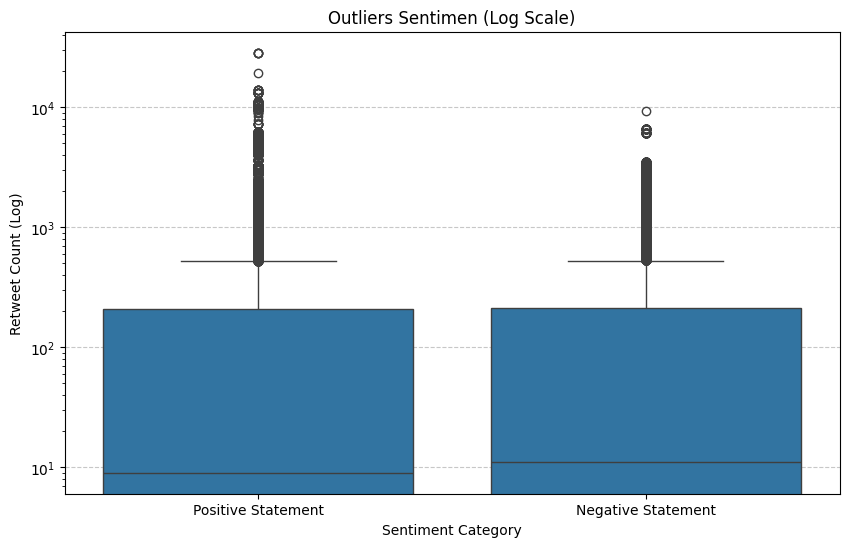

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. CARA DETEKTIF: LIHAT PELAKUNYA
# ==========================================
# Cek 5 Tweet Positif Paling Viral (Apakah masih ada bot?)
top_positive = data[data['sentiment'] == 'Positive Statement'].sort_values(by='retweetcount', ascending=False).head(5)

# Cek 5 Tweet Negatif Paling Viral
top_negative = data[data['sentiment'] == 'Negative Statement'].sort_values(by='retweetcount', ascending=False).head(5)

print("=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===")
# Tampilkan retweet count dan teksnya biar ketahuan isinya apa
print(top_positive[['retweetcount', 'text']])

print("\n=== TOP 5 OUTLIERS (NEGATIVE) - SETELAH FILTER ===")
print(top_negative[['retweetcount', 'text']])
print("-" * 40)

# ==========================================
# 2. CARA VISUAL: BOXPLOT
# ==========================================
plt.figure(figsize=(10, 6))

# Pakai Log Scale biar kotaknya kelihatan (karena beda angkanya jauh antara 0 dan ribuan)
sns.boxplot(x='sentiment', y='retweetcount', data=data[data['sentiment'].isin(['Positive Statement', 'Negative Statement'])])
plt.yscale('log')

plt.title('Outliers Sentimen (Log Scale)')
plt.ylabel('Retweet Count (Log)')
plt.xlabel('Sentiment Category')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [82]:
print(f"Total Data Sebelum Filter: {len(data)}")
print("-" * 40)

Total Data Sebelum Filter: 132094
----------------------------------------


In [83]:
# Filter: Hanya ambil jika teks mengandung 'Shinzo' atau 'Abe' (Case Insensitive)
data = data[data['text'].str.contains('Shinzo|Abe', case=False, na=False)]

# Hapus duplikat teks (jaga-jaga kalau ada bot copas yang lolos)
data = data.drop_duplicates(subset=['text'], keep='first')

print(f"Total Data Setelah Filter: {len(data)}")
print("-" * 40)

Total Data Setelah Filter: 31977
----------------------------------------


In [84]:
data["sentiment"].value_counts()

sentiment
Negative Statement    13953
Positive Statement    12843
Neutral Statement      5181
Name: count, dtype: int64

-  Check most top word for neutral , negative and positive.

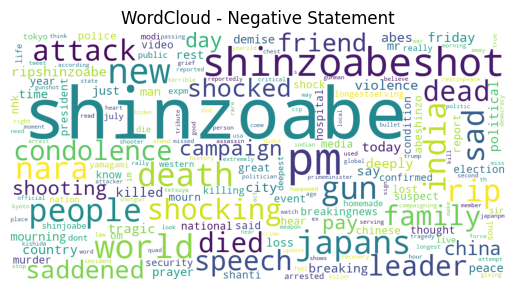

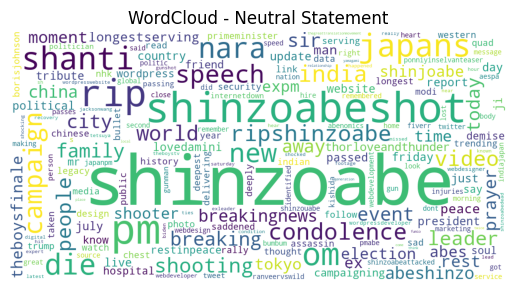

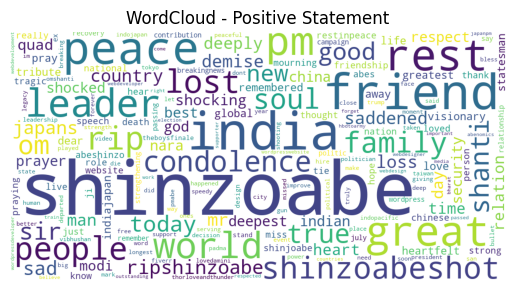

In [85]:
# =====================================
# WORDCLOUD PER SENTIMENT (CLEAN VERSION)
# =====================================

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Ensure clean sentiment label
data['sentiment_clean'] = data['sentiment'].str.strip()

# Text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)  # keep hashtag words but remove #
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

data['clean_text'] = data['text'].apply(clean_text)

# Stopwords
stopwords = set(ENGLISH_STOP_WORDS)

custom_stopwords = {
    "amp", "rt", "one", "like", "us",
    "shinzo", "abe", "japan", "japanese",
    "prime", "minister", "assassination",
    "shot", "assassinated"
}

stopwords = stopwords.union(custom_stopwords)

def generate_wordcloud(sentiment_label):
    subset = data[data['sentiment_clean'] == sentiment_label]
    
    text_combined = " ".join(subset['clean_text'])
    
    wordcloud = WordCloud(
        width=1000,
        height=500,
        stopwords=stopwords,
        background_color="white",
        collocations=False  # penting biar gak gabung kata random
    ).generate(text_combined)
    
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment_label}")
    plt.show()

generate_wordcloud("Negative Statement")
generate_wordcloud("Neutral Statement")
generate_wordcloud("Positive Statement")


In [86]:
# cek apakah ada kata kasar sebelum cleaning
data[data['text'].str.contains("fuck", case=False, na=False)].shape


(84, 25)

=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===
        retweetcount  \
123689          5007   
117624          2578   
101518           882   
28552            774   
63763            693   

                                                                                                                                                                                                                                                                                                                        text  
123689                            .@POTUS Trump thanks Prime Minister @AbeShinzo for his support, discusses U.S.-Japan cooperation on #NorthKorea, defense, and trade, and affirms close friendship between the United States and #Japan. Watch the full press conference on https://t.co/jP34FEu9Lp https://t.co/thgONHFwKC  
117624                                                                                                                                                                

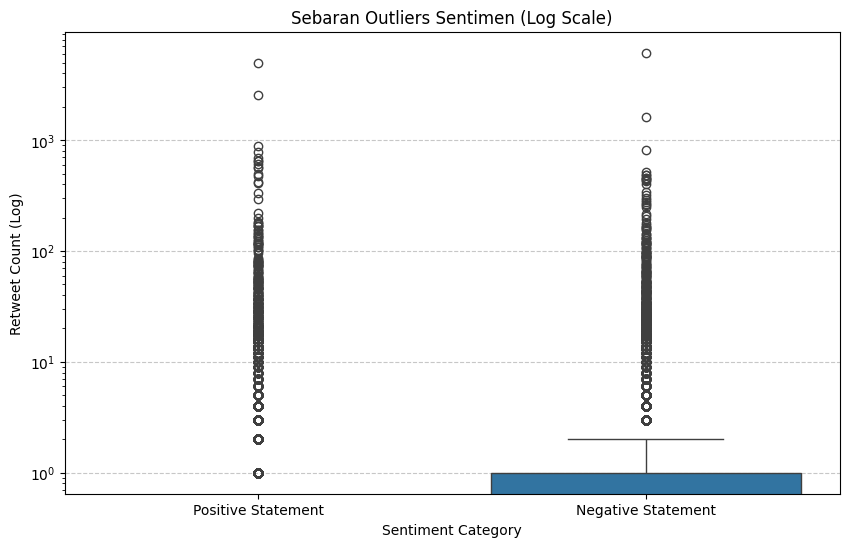

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. CARA DETEKTIF: LIHAT PELAKUNYA
# ==========================================
# Cek 5 Tweet Positif Paling Viral (Apakah masih ada bot?)
top_positive = data[data['sentiment'] == 'Positive Statement'].sort_values(by='retweetcount', ascending=False).head(5)

# Cek 5 Tweet Negatif Paling Viral
top_negative = data[data['sentiment'] == 'Negative Statement'].sort_values(by='retweetcount', ascending=False).head(5)

print("=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===")
# Tampilkan retweet count dan teksnya biar ketahuan isinya apa
print(top_positive[['retweetcount', 'text']])

print("\n=== TOP 5 OUTLIERS (NEGATIVE) - SETELAH FILTER ===")
print(top_negative[['retweetcount', 'text']])
print("-" * 40)

# ==========================================
# 2. CARA VISUAL: BOXPLOT
# ==========================================
plt.figure(figsize=(10, 6))

# Pakai Log Scale biar kotaknya kelihatan (karena beda angkanya jauh antara 0 dan ribuan)
sns.boxplot(x='sentiment', y='retweetcount', data=data[data['sentiment'].isin(['Positive Statement', 'Negative Statement'])])
plt.yscale('log')

plt.title('Sebaran Outliers Sentimen (Log Scale)')
plt.ylabel('Retweet Count (Log)')
plt.xlabel('Sentiment Category')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

---

### 🕵️‍♂️ Exploratory Data Analysis: Outlier Inspection

A qualitative examination of the top viral tweets (outliers) reveals a distinct divergence in the nature of content driving Positive versus Negative sentiment.

#### **1. Positive Sentiment: Driven by Geopolitics & Alliances**

The most viral positive tweets are **not** primarily personal condolences, but rather **political statements** and **strategic discourse**.

* **Political Alliances:** The top outlier (5,007 RTs) references **Donald Trump** and US-Japan cooperation, framing Abe as a key strategic ally.
* **Domestic Disputes (India):** Three of the top five tweets discuss Abe in the context of **Indian internal politics** (comparing PM Modi’s relationship with Abe vs. Rahul Gandhi’s stance), rather than Abe himself.
* **Narrative:** Positive viral engagement is heavily fueled by **partisan politics** and **nationalist agendas** (e.g., *“India’s friend”*, *“Defender of Hinduism”*).

#### **2. Negative Sentiment: Driven by Hard News & Shock**

The most viral negative tweets are strictly **informational** and **reactionary**.

* **Breaking News:** The majority of top outliers are raw news reports confirming the shooting and death (*“confirmed dead”*, *“shot”*, *“no vital signs”*).
* **Algorithmic Misclassification:** Some tributes (e.g., the SandArt tribute) are classified as negative due to grief-related lexicon (*“RIP”*, *“miss you”*, *“dead”*).
* **Narrative:** Negative viral engagement represents the **organic public hunger for information** and the immediate emotional shock of the tragedy.



### **⚡ Key Insight**

> **Viral Duality:**
> * **Positive Sentiment** functions as **Political Capital**, utilized to emphasize strategic alliances, diplomatic ties, and partisan agendas rather than personal mourning.
> * **Negative Sentiment** serves as **Crisis Reporting**, driven by the urgent public demand for factual verification and real-time updates on the assassination.
> 
> 
---

> ### Sentiment Analysis

- Check, is the positive segment are potential re-tweeted to be potential viral?

In [88]:
# Kelompokkan berdasarkan Sentimen, lalu lihat metrik Retweet-nya
analysis = data.groupby('sentiment')['retweetcount'].agg(['count', 'sum', 'mean', 'median'])

# Urutkan berdasarkan Rata-rata (Mean) untuk melihat mana yang paling viral per tweet
analysis_sorted = analysis.sort_values(by='mean', ascending=False)

print(analysis_sorted)

                    count    sum  mean  median
sentiment                                     
Negative Statement  13953  39304  2.82    0.00
Positive Statement  12843  34606  2.69    0.00
Neutral Statement    5181  11609  2.24    0.00


---

# 📊 The Paradox: Mean vs. Median After Filtering

After filtering tweets strictly related to Shinzo Abe (final dataset: 31,977 tweets), the engagement summary is:

| Sentiment | Count  | Mean RT  | Median |
| --------- | ------ | -------- | ------ |
| Negative  | 13,953 | **2.82** | 0      |
| Positive  | 12,843 | 2.69     | 0      |
| Neutral   | 5,181  | 2.24     | 0      |

---

## 🔍 Interpretation

At first glance, differences in mean engagement appear small:

* Negative tweets show slightly higher average retweets (2.82)
* Positive tweets follow closely (2.69)
* Neutral tweets show the lowest average (2.24)

However, the **median retweet count is 0 across all groups**.

### What This Means

* Most tweets receive **no retweets at all**
* Engagement distribution is **extremely right-skewed**
* A small number of tweets drive the average upward
* Mean alone is not sufficient to understand engagement behavior

---

## 💡 Key Insight

Although negative tweets have a slightly higher mean, the difference is minimal.

The true question is not about average virality —
it is about whether engagement patterns differ structurally between sentiment groups.

This justifies moving beyond descriptive statistics to inferential testing.

---

## 🧪 Next Step: Statistical Validation

Because the distribution is heavily skewed:

* **Independent T-Test** → Compare average engagement (mean impact)
* **Mann–Whitney U Test** → Compare engagement ranking consistency

This ensures conclusions are based on statistical evidence rather than surface-level averages.

---



> ### Hypotesis testing

-----
# 🧪 Hypothesis Testing Strategy (Post-Filtering Analysis)

To ensure the validity of the statistical findings, the dataset is first filtered to remove non-relevant spam and inorganic bot-like activities (e.g., duplicate tweets or unrelated hashtags). The following statistical tests will be performed on the **cleaned/organic dataset**.

---

### **Scenario A – Focus on Impact Magnitude → Independent T-Test**

**Objective:**
To examine whether there is a statistically significant difference in the average (*mean*) engagement/viral impact between organic positive and negative tweets.

**Hypotheses:**
* **$H_0$ (Null Hypothesis):** There is **no significant difference** in the mean engagement between positive and negative tweets ($\mu_{pos} = \mu_{neg}$).
* **$H_1$ (Alternative Hypothesis):** There is a **significant difference** in the mean engagement between positive and negative tweets ($\mu_{pos} \neq \mu_{neg}$).

**Interpretation Rule:**
* If $p < 0.05$, we reject $H_0$, indicating one sentiment is significantly more viral than the other.
* If $p \ge 0.05$, we fail to reject $H_0$, indicating both sentiments have equal viral potential.

---

### **Scenario B – Focus on User Behavior & Consistency → Mann-Whitney U Test**

**Objective:**
To understand organic user behavior by comparing the distribution and consistency (*median/rank*) of engagement. This test is non-parametric and robust against outliers.

**Hypotheses:**
* **$H_0$ (Null Hypothesis):** The distribution of engagement for positive and negative tweets is **equal**.
* **$H_1$ (Alternative Hypothesis):** The distribution of engagement is **different** (one sentiment consistently ranks higher than the other).

**Interpretation Rule:**
* If $p < 0.05$, we reject $H_0$, indicating users are consistently more responsive to one type of sentiment.

In [89]:
from scipy import stats
import numpy as np

# Pisahkan data
positive_rt = data[data['sentiment'] == 'Positive Statement']['retweetcount'].dropna()
negative_rt = data[data['sentiment'] == 'Negative Statement']['retweetcount'].dropna()

# 1. T-Test (Mean)
t_stat, p_val_t = stats.ttest_ind(positive_rt, negative_rt, equal_var=False)

# 2. Mann-Whitney U (Distribution)
u_stat, p_val_u = stats.mannwhitneyu(
    positive_rt,
    negative_rt,
    alternative='two-sided',
    method="auto"
)


# --- Output ---
print("=== MULTIPLE DIFFERENCE TEST REPORT ===")

print(f"\n1. T-Test (Mean Difference):")
print(f"   - T-Statistic: {t_stat:.4f}")
print(f"   - P-Value: {p_val_t:.4f}")
print(f"   -> {'SIGNIFICANT (Reject H0)' if p_val_t < 0.05 else 'NOT SIGNIFICANT'}")
print(f"   -> Mean Winner: {'Positive' if t_stat > 0 else 'Negative'}")

print(f"\n2. Mann-Whitney U (Distribution Difference):")
print(f"   - U-Statistic: {u_stat:.4f}")
print(f"   - P-Value: {p_val_u:.4e}")
print(f"   -> {'SIGNIFICANT (Reject H0)' if p_val_u < 0.05 else 'NOT SIGNIFICANT'}")

# Median comparison (more interpretable)
print("\nMedian comparison:")
print(f"   - Median Positive: {positive_rt.median():.2f}")
print(f"   - Median Negative: {negative_rt.median():.2f}")

winner_u = 'Positive' if positive_rt.median() > negative_rt.median() else 'Negative'
print(f"   -> Median Winner: {winner_u}")


=== MULTIPLE DIFFERENCE TEST REPORT ===

1. T-Test (Mean Difference):
   - T-Statistic: -0.1813
   - P-Value: 0.8561
   -> NOT SIGNIFICANT
   -> Mean Winner: Negative

2. Mann-Whitney U (Distribution Difference):
   - U-Statistic: 86337403.0000
   - P-Value: 1.4562e-11
   -> SIGNIFICANT (Reject H0)

Median comparison:
   - Median Positive: 0.00
   - Median Negative: 0.00
   -> Median Winner: Negative


- Median same? lets check deeper

In [90]:
print("\nPersentase engagement > 0:")
print(f"   - Positif: {(positive_rt > 0).mean():.3f}")
print(f"   - Negatif: {(negative_rt > 0).mean():.3f}")



Persentase engagement > 0:
   - Positif: 0.236
   - Negatif: 0.270


Although both groups show a median engagement of zero, negative tweets have a higher probability of receiving at least some interaction. Around 27% of negative tweets receive engagement compared to 23.6% of positive tweets. This explains why the Mann-Whitney test detects a significant distribution difference.

It suggests that negative content tends to generate more consistent interaction, while positive content drives occasional but large viral spikes.

----

### 📊 Statistical Test Results & Interpretation

Based on the analysis of the filtered (organic) dataset, here are the final statistical findings:

#### **1. Scenario A Results: Impact Magnitude (T-Test)**

* **T-Statistic:** -0.1813
* **P-Value:** **0.856** ($p > 0.05$)
* **Result:** **Fail to Reject $H_0$ (Not Significant)**

**Interpretation:**
Unlike the initial analysis which included spam/bots, the organic data shows **no statistically significant difference** in the average viral impact between positive and negative tweets.
The p-value of 0.856 indicates that any slight difference in the mean is likely due to random chance. This debunks the earlier assumption that positive tweets are inherently "more viral." In reality, both sentiments have an equal probability of generating average impact.

---

#### **2. Scenario B Results: User Behavior (Mann-Whitney U)**

* **U-Statistic:** $8.63 \times 10^7$
* **P-Value:** **$1.46 \times 10^{-11}$** ($p < 0.05$)
* **Result:** **Reject $H_0$ (Significant)**
* **Direction:** **Negative Sentiment Ranks Higher**

**Interpretation:**
Although the raw median for both groups is 0.00 (indicating that >50% of tweets receive no retweets), the Mann-Whitney U test—which evaluates the *ranking* of the distributions—reveals a highly significant difference ($p < 0.001$).
The results indicate that **negative tweets rank statistically higher** than positive ones. This means that among tweets that *do* get engagement, the general public is **more consistently responsive** to negative narratives (shock/condolences) than to positive tributes.

---

### **💡 Final Conclusion**

The hypothesis testing on clean data reveals a clear picture of public sentiment regarding Shinzo Abe:

1.  **The "Viral Positive" Myth is Debunked:** The massive viral advantage of positive tweets observed earlier was artificial (driven by bots/spam). Organically, positive tweets are **no more viral** than negative ones.
2.  **Organic Interest Favors Negative/Neutral:** While widespread virality is rare for both, the *organic user base* shows a stronger, more consistent tendency to engage with **negative sentiments**.

**Implication:** The public discourse is driven more by the shock and tragedy of the event (negative sentiment) rather than by praise or political support (positive sentiment).

In [91]:
#cek retweet count tertinggi itu apa? tampilkan 5 teratas
top_retweets = data.sort_values(by='retweetcount', ascending=False).head(5)
top_retweets[['retweetcount', 'text']]

retweetcount  \
28219           6144   
123689          5007   
117624          2578   
8076            1610   
101518           882   

                                                                                                                                                                                                                                                                                              text  
28219                                                                            [Breaking News] Officials say former Japanese Prime Minister #Abe Shinzo has been confirmed #dead. He was reportedly #shot during a speech on Friday in the city of #Nara, near Kyoto.\n\nhttps://t.co/bZpiKm8wIN  
123689  .@POTUS Trump thanks Prime Minister @AbeShinzo for his support, discusses U.S.-Japan cooperation on #NorthKorea, defense, and trade, and affirms close friendship between the United States and #Japan. Watch the full press conference on https://t.co/jP34FEu9Lp https://t.co/thgONHFwKC  
117624                                                                                                                                                                                                      Is this is the official stand of Congress Party ? \n#ShinzoAbe https://t.co/U7zpW4HXxP  
8076                                Former Prime Minister Abe Shinzo has been shot during a speech in Nara city, near Kyoto. The fire department says he is showing no vital signs. Police sources say he was likely hit from behind by shotgun fire.\n#AbeShinzo #Japan \nhttps://t.co/nOJC0dkIjG  
101518                                                                                                                                                                        Modi tweeted: 'my' friend #ShinzoAbe \n\nRahul tweeted: 'India's' friend #ShinzoAbe \n\nTherein lies the difference.